**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [109]:
url = "https://raw.githubusercontent.com/Rosdiana13/DM-Week7/refs/heads/main/bank.csv"
df = pd.read_csv(url, delimiter=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2306,36,technician,married,tertiary,no,6,yes,no,cellular,27,jan,100,1,435,1,failure,no
4464,53,services,divorced,secondary,no,4554,no,no,cellular,5,feb,8,6,-1,0,unknown,no
2666,31,management,single,tertiary,no,574,yes,no,cellular,16,jul,410,2,-1,0,unknown,no
110,21,student,single,secondary,no,2488,no,no,cellular,30,jun,258,6,169,3,success,yes
2679,30,services,married,secondary,no,699,yes,no,unknown,29,may,544,1,-1,0,unknown,no
2688,27,services,married,secondary,no,-1202,yes,no,unknown,4,jun,749,2,-1,0,unknown,no
2899,46,blue-collar,married,secondary,no,123,no,no,cellular,20,aug,381,3,-1,0,unknown,no
2575,45,blue-collar,married,secondary,no,827,yes,no,unknown,15,may,319,5,-1,0,unknown,no
3840,48,blue-collar,married,secondary,no,425,yes,no,telephone,9,jul,693,2,-1,0,unknown,no
1930,32,services,married,secondary,no,255,yes,yes,unknown,21,may,86,2,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [111]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [112]:
col_names = ['job',	'education',	'contact',	'poutcome']
for col in col_names:
  print(df[col].value_counts(dropna=False))
  # pengecekan yang unknown di masing2 4 colum mempunya jumlahnya ada berapa
  # sangan berguna untuk pertimbangan apakah di hapus atau tidak yang di unknow
  # Selain itu ada cara lain semisa tidak di hapus dengan mengantinya dengan rata-rata terbaru

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


In [113]:
df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [114]:
df.dropna(inplace=True)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [115]:
for col in ['job', 'education']:
    print(f"Unique values in {col}:", df[col].unique())

# Untuk pengecekan ulang saja apakah yang unknow sudah terhapus apa belum

Unique values in job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
Unique values in education: ['primary' 'secondary' 'tertiary']


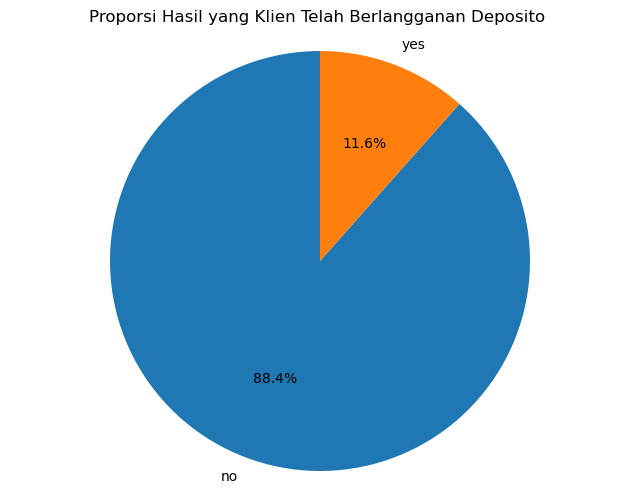

In [116]:
species_counts = df['y'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Hasil yang Klien Telah Berlangganan Deposito ')
plt.axis('equal')
plt.show()

# Diaram ini menunjukan berapa persen klien yang telah berlangganan deposito

In [119]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


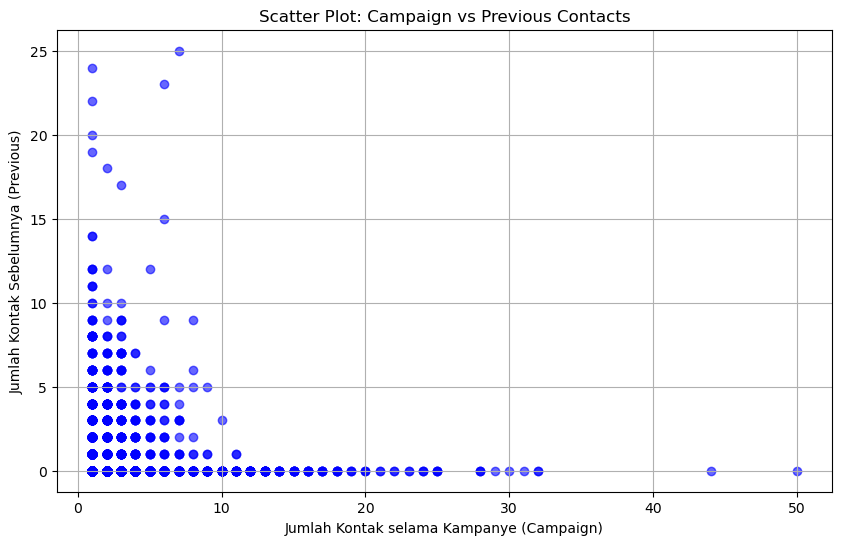

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['campaign'], df['previous'], color='blue', alpha=0.6)
plt.title('Scatter Plot: Campaign vs Previous Contacts')
plt.xlabel('Jumlah Kontak selama Kampanye (Campaign)')
plt.ylabel('Jumlah Kontak Sebelumnya (Previous)')
plt.grid()
plt.show()

# untuk membuat scatter plot yang menunjukkan hubungan antara jumlah kontak selama kampanye (Campaign) 
# dan jumlah kontak sebelumnya (Previous). Kode ini menggunakan pustaka Pandas dan Matplotlib atau Seaborn.
# Kalau di lihat ternyata jml kontak selama kampanye kebanya berada di bawah 10  dan jumlah kontak sebelumnya juga di bawah 10
# dan terlihat bawah tidak ada terlihat polanya atau garisnya yang berarti kampanya dan jumlah kontak tidak ada hubungannya dengan 
# jumlah kontak sebelum dan tidak terlalu berpengaruh kampanyenya

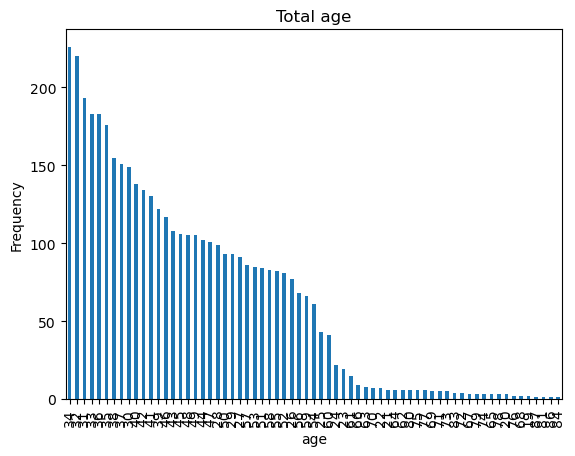

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

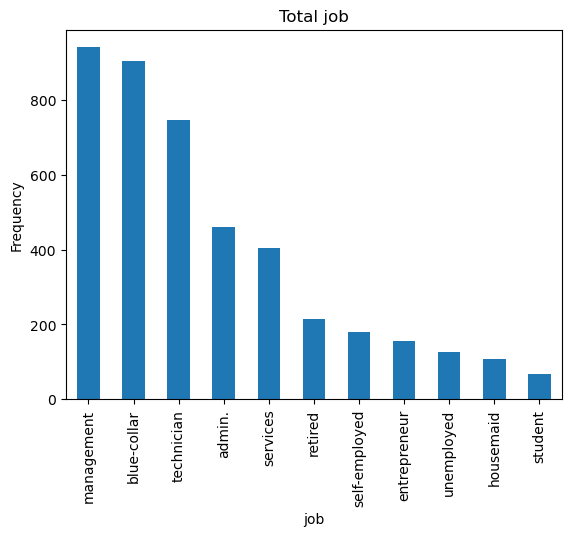

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

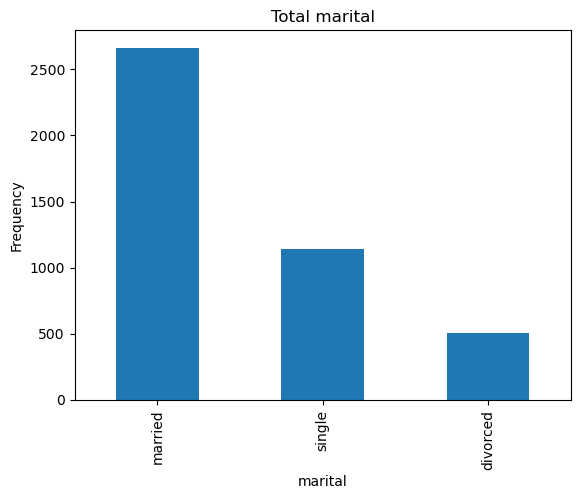

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

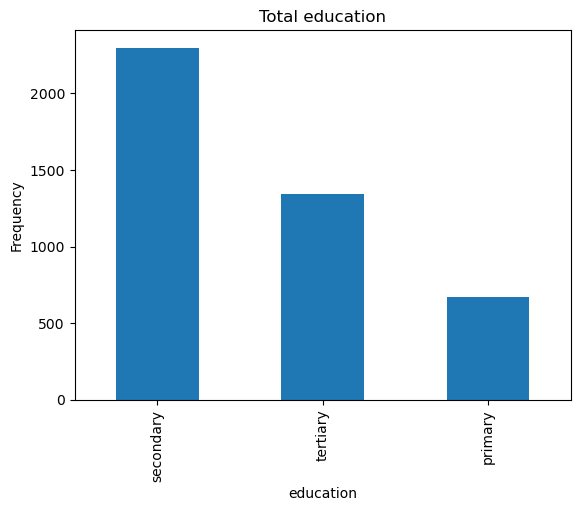

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

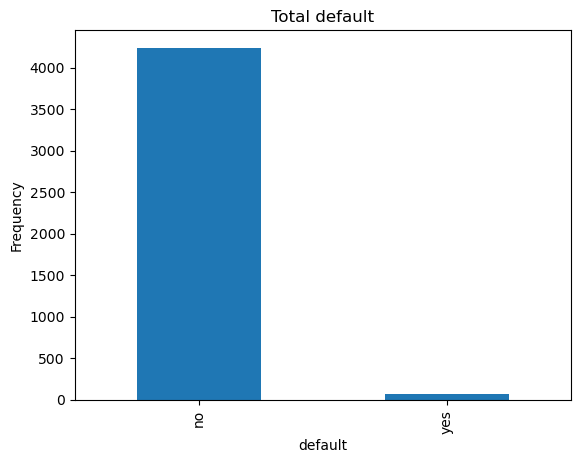

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

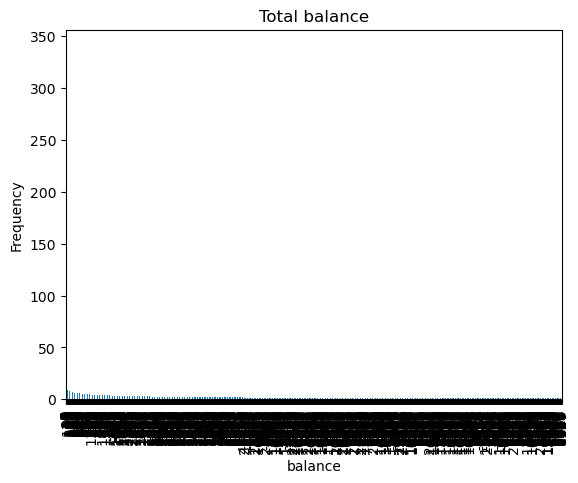

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

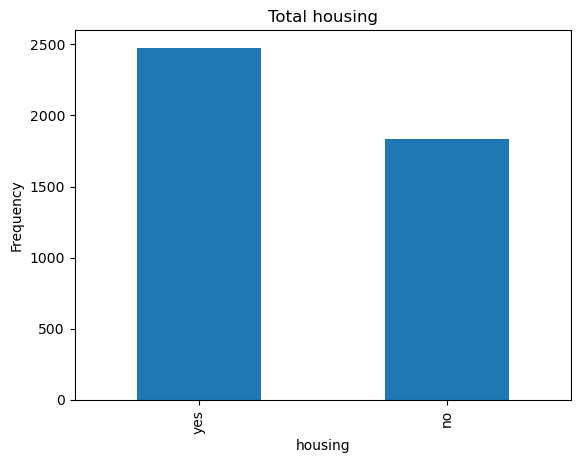

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

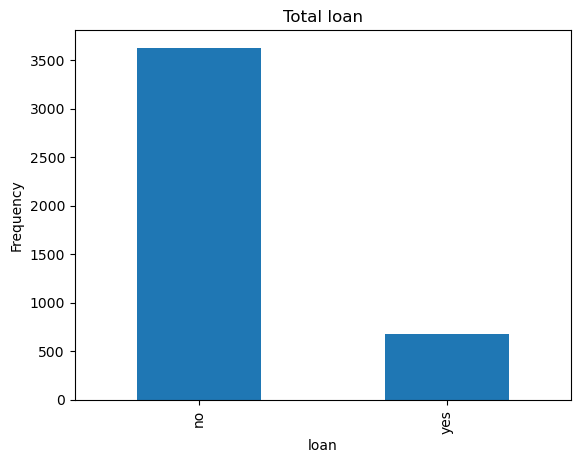

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

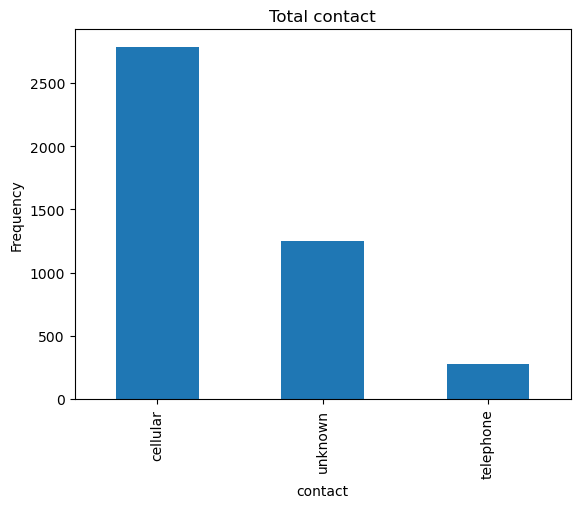

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

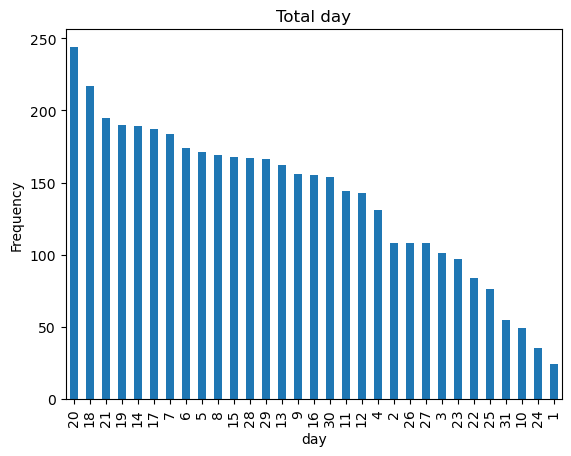

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

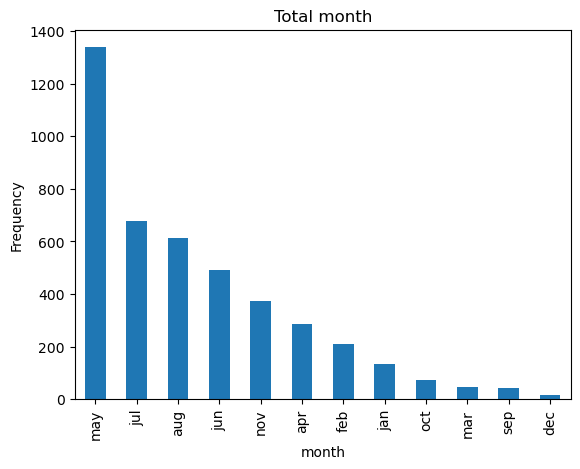

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

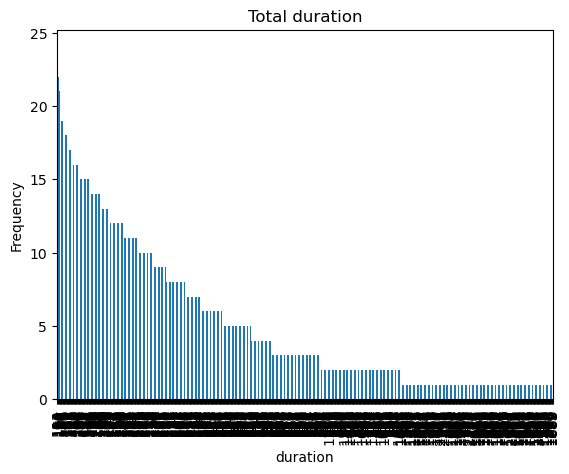

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

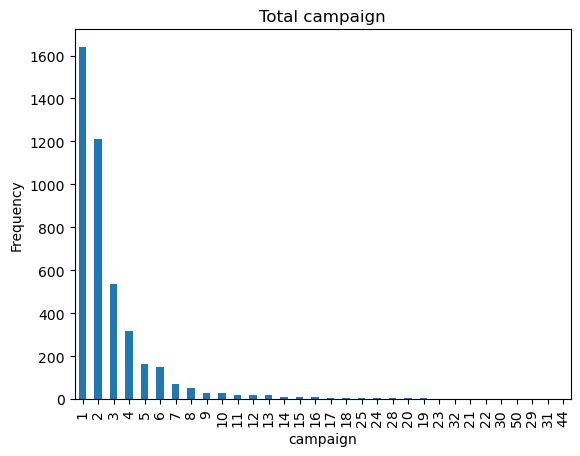

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

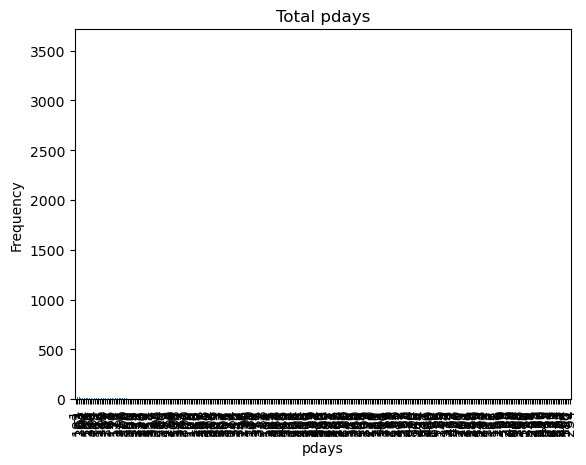

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

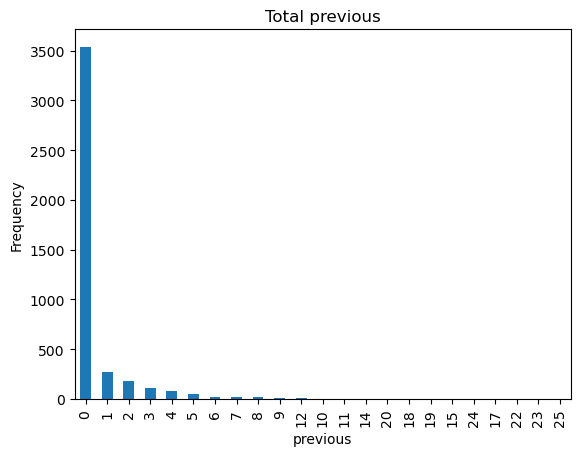

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

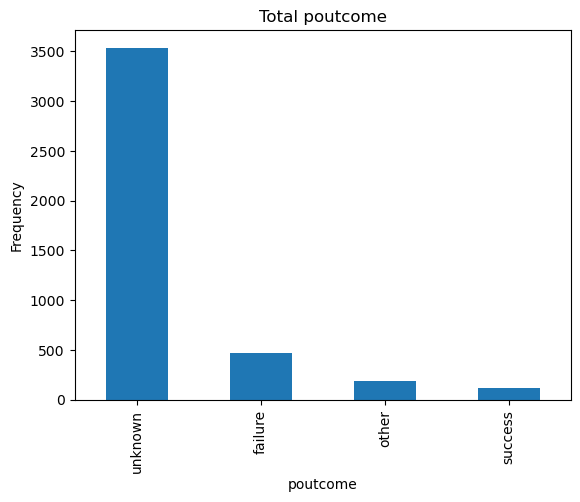

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

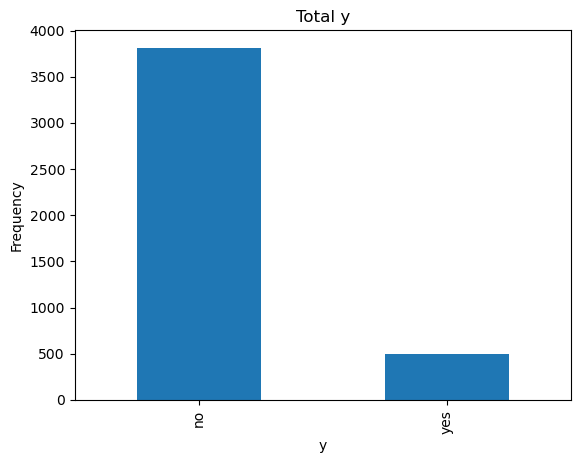

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 42 44 26 55 53 68 32 49 78 23
 38 52 34 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47 70 65
 62 66 61 19 81 83 64 80 67 71 72 69 79 73 86 74 76 87 84]
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary']
['no' 'yes']
[ 1787  4789  1350 ...  -333 -3313  1137]
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 12 21 26 22  2  4 15  8 28
  9 18  1 10 31 25 24]
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148  140  109  125  169  182  247  149   74
  897   81   40  958  354  150   97  132  765   16  609  106  365  205
   11  105   59  425  204 1018 1740   98  441  272  159  295  314  579
  554  323  227  13

In [ ]:
for col in df :
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Total {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    for column in df :
        print(df[column].unique())

# jadi ini adalah diagram dari masing kolum unutuk melihat Freaquancy.

In [118]:
le = LabelEncoder()
for col in ['job', 'marital', 'education', 'loan', 'default', 'housing', 'contact', 'month', 'poutcome']:
  df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no


In [58]:
le_species = LabelEncoder()
df['y'] = le_species.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [59]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,40.970309,4.362793,1.148689,1.155648,0.016933,1410.662723,0.574113,0.158432,0.643470,15.908142,5.520297,264.833449,2.805382,39.741591,0.544885,2.558571,0.115518
std,10.500185,3.214331,0.600017,0.665448,0.129037,3015.650889,0.494534,0.365188,0.898957,8.205590,3.013195,260.940391,3.134040,100.048485,1.705530,0.994061,0.319684
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,66.500000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,440.000000,1.000000,0.000000,0.000000,16.000000,6.000000,187.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1456.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,10.000000,2.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


In [60]:
df['y'].unique()
df['y'].value_counts()

0    3813
1     498
Name: y, dtype: int64

In [61]:
df['marital'].unique()
df['marital'].value_counts()

1    2664
2    1144
0     503
Name: marital, dtype: int64

In [62]:
df['education'].unique()
df['education'].value_counts()

1    2298
2    1342
0     671
Name: education, dtype: int64

In [63]:
df['default'].unique()
df['default'].value_counts()

0    4238
1      73
Name: default, dtype: int64

In [64]:
df['housing'].unique()
df['housing'].value_counts()

1    2475
0    1836
Name: housing, dtype: int64

In [65]:
df['contact'].unique()
df['contact'].value_counts()

0    2784
2    1247
1     280
Name: contact, dtype: int64

In [66]:
df['month'].unique()
df['month'].value_counts()

8     1338
5      678
1      612
6      492
9      375
0      287
3      212
4      134
10      74
7       46
11      45
2       18
Name: month, dtype: int64

In [67]:
df['poutcome'].unique()
df['poutcome'].value_counts()

3    3536
0     470
1     188
2     117
Name: poutcome, dtype: int64

## Machine Learning

In [68]:
X = df.drop('y', axis=1)
y = df['y']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape, X_test.shape

((3448, 16), (863, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [74]:
y_pred_RForest = rf_clf.predict(X_test)

In [76]:
print('Model accuracy score with criterion Random Forest: {0:0.4f}'.format(accuracy_score(y_test, y_pred_RForest)))

Model accuracy score with criterion Random Forest: 0.9166


In [77]:
print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9166


In [79]:
cm = confusion_matrix(y_test, y_pred_RForest)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_RForest))

Confusion Matrix
 [[761  15]
 [ 57  30]]
Accuracy Score:  0.9165701042873696


In [80]:
print('Classification Report\n', classification_report(y_test, y_pred_RForest))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       776
           1       0.67      0.34      0.45        87

    accuracy                           0.92       863
   macro avg       0.80      0.66      0.70       863
weighted avg       0.90      0.92      0.90       863



## Keimpulan


Secara keseluruhan, model Random Forest memiliki akurasi yang baik, tetapi ada indikasi potensi overfitting pada data latih yang sempurna. Meskipun model menunjukkan performa tinggi pada data uji, perlu ada perhatian khusus pada klasifikasi kelas 1 untuk meningkatkan recall dan precision-nya. Langkah selanjutnya mungkin melibatkan eksplorasi teknik penanganan kelas tidak seimbang atau penyesuaian hyperparameter untuk lebih meningkatkan kinerja model, terutama pada kelas yang kurang terwakili

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
rf_GBC = GradientBoostingClassifier(learning_rate=0.1).fit(X_train, y_train)

In [88]:
y_pred_GradientBoosting = rf_GBC.predict(X_test)

In [89]:
print('Model accuracy score with criterion GradiantBoosting: {0:0.4f}'.format(accuracy_score(y_test, y_pred_GradientBoosting)))

Model accuracy score with criterion GradiantBoosting: 0.9027


In [90]:
print('Training set score: {:.4f}'.format(rf_GBC.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_GBC.score(X_test, y_test)))

Training set score: 0.9333
Test set score: 0.9027


In [91]:
cm = confusion_matrix(y_test, y_pred_GradientBoosting)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_GradientBoosting))

Confusion Matrix
 [[752  24]
 [ 60  27]]
Accuracy Score:  0.9026651216685979


In [92]:
print('Classification Report\n', classification_report(y_test, y_pred_GradientBoosting))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       776
           1       0.53      0.31      0.39        87

    accuracy                           0.90       863
   macro avg       0.73      0.64      0.67       863
weighted avg       0.89      0.90      0.89       863



# Kesimpulan

Secara keseluruhan, model Gradient Boosting Classifier memiliki akurasi yang baik, tetapi performa model menunjukkan ketidakseimbangan dalam pengklasifikasian antara kelas 0 dan kelas 1. Meskipun model efektif dalam memprediksi kelas 0, ia kurang efektif dalam menangkap contoh dari kelas 1, yang dapat menjadi perhatian terutama jika kelas 1 merupakan kelas yang lebih penting atau jarang. Mungkin perlu dilakukan upaya lebih lanjut seperti penyesuaian parameter, penggunaan teknik oversampling atau undersampling, atau mencoba algoritma lain untuk meningkatkan kinerja pada kelas 1.